## Statistique inférentielle - Théorie de l'estimation - Exercice 12.3

Ici, il s'agira de comparer l'efficacité de 4 estimateurs de la même chose, la taille de la population globale.

En effet, il s'agira de tirer un échantillon de taille donnée (sans remise) et sur base des numéros de ces éléments d'essayer d'estimer la taille de la population globale de laquelle ces éléments sont tirés.

Plusieurs estimateurs simples sont proposés:

- Pour les deux premiers estimateurs on partira du principe que si on connaissait l'élement milieu, $m$, on devrait avoir $m-1$ éléments avant l'élément 'milieu' et $m-1$ éléments après l'élément 'milieu'. On aura donc au total, $(m-1) + 1 + (m-1)$ éléments. Ce qui doit nous donner $N$. 
Reste que l'élément milieu, $m$, n'est pas connu mais pourra s'estimer par la médiane ou la moyenne de l'échantillon tiré.

Au aura donc, pour nos deux premiers estimateurs: $\hat{N_{1}} = 2 {\tilde X} -1$ et $\hat{N_{2}} = 2 {\hat X} -1$

- On remarque que ces estimateurs ne sont pas idéaux car ils peuvent nous donner des résultats qui sont inférieurs au maximum des numéros tirés (voir pdf pour un exemple). De façon à ne pas avoir ce défaut, on essayera autre chose. Tout d'abord, on classera les numéros tirés en ordre croissant de façon à obtenir: $X_{(1)}<X_{(2)}<...<X_{(n-1)}<X_{(n)}$. Pour une distribution de numéro équilibrée, on pourrait s'attendre à ce que le nombre de numéro avant le plus petit nombre tiré sera équivalent au nombre de numéro après le plus grand nombre tiré soit:
$$N-X_{(n)}\approx X_{(1)}-1$$
D'où on peut tirer un troisième estimateur: $\hat{N_{3}}=X_{(n)}+X_{(1)}-1$.
On remarque que là, pour le coup, l'estimateur ne pourra jamais être inférieur aux valeurs tirées dans l'échantillon!!!.

- Enfin, pour le dernier estimateur, on généralisera l'approche précédente en considérant que le nombre de numéros non-tirés après le plus grand numéro tiré devrait être la moyenne du nombre de numéros non-tirés avant $X_{(1)}$, du nombre de numéros non-tirés entre $X_{(1)}$ et $X_{(2)}$... soit $$N-X_{(n)} \approx \{[X_{(1)}-1]+[X_{(2)}-X_{(1)}-1]+...+[X_{(n)}-X_{(n-1)}-1]\}/n$$ soit encore $$N-X_{(n)} \approx [X_{(n)}-n]/n$$
soit finalement $$\hat{N_{4}}=\frac{n+1}{n}X_{(n)}-1$$


In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import math

L'efficacité d'un estimateur est liée à la variance de cet estimateur. Ainsi, plus un estimateur est efficace moins sa variance est élevée (plus son estimation est centrée sur la valeur attendue).

In [79]:
population_size = 5000000
sample_size = 50
n_samples = 5000

In [80]:
def estimator_1(x):
    return 2*np.median(x)-1

In [81]:
def estimator_2(x):
    return 2*np.mean(x)-1 

In [82]:
def estimator_3(x):
    sorted_x = np.sort(x)
    n = len(x)
    return sorted_x[n-1]+sorted_x[0]-1

In [83]:
def estimator_4(x):
    sorted_x = np.sort(x)
    n = len(x)
    return (n+1.0)/n*sorted_x[n-1]-1

In [84]:
population = range(population_size)

est_1_list = []
est_2_list = []
est_3_list = []
est_4_list = []
for sample in range(n_samples):
    x = random.sample(population,sample_size)
    
    est_1 = estimator_1(x)
    est_2 = estimator_2(x)
    est_3 = estimator_3(x)
    est_4 = estimator_4(x)
    
    #print('[{},{},{},{}]'.format(est_1,est_2,est_3,est_4))
    
    est_1_list.append(est_1)
    est_2_list.append(est_2)
    est_3_list.append(est_3)
    est_4_list.append(est_4)

In [85]:
estimator_df = pd.DataFrame()

estimator_df['est_1'] = est_1_list
estimator_df['est_2'] = est_2_list
estimator_df['est_3'] = est_3_list
estimator_df['est_4'] = est_4_list

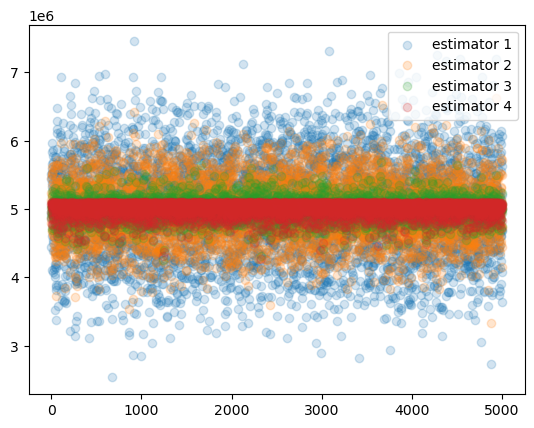

In [86]:
alpha = 0.2
plt.scatter(x=range(estimator_df.shape[0]),y=estimator_df['est_1'],label='estimator 1',alpha=alpha)
plt.scatter(x=range(estimator_df.shape[0]),y=estimator_df['est_2'],label='estimator 2',alpha=alpha)
plt.scatter(x=range(estimator_df.shape[0]),y=estimator_df['est_3'],label='estimator 3',alpha=alpha)
plt.scatter(x=range(estimator_df.shape[0]),y=estimator_df['est_4'],label='estimator 4',alpha=alpha)

plt.legend()
#plt.ylim(bottom=0)
plt.show()

Dans une approche plus élastique (scalable), on aura:

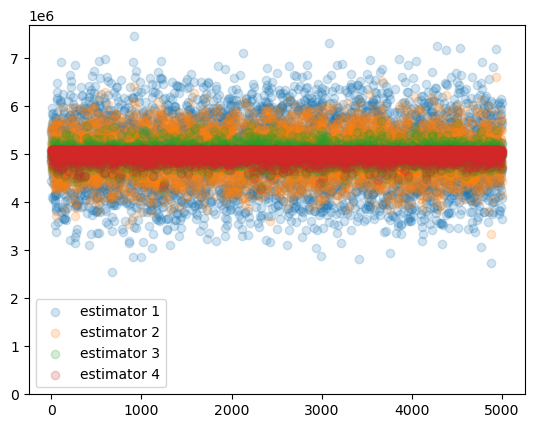

In [88]:
for estimator in [1,2,3,4]:
    col_label = 'est_{}'.format(estimator)
    draw_label = 'estimator {}'.format(estimator)
    
    plt.scatter(x=range(estimator_df.shape[0]),y=estimator_df[col_label],label=draw_label,alpha=alpha)

plt.legend()
plt.ylim(bottom=0)
plt.show()

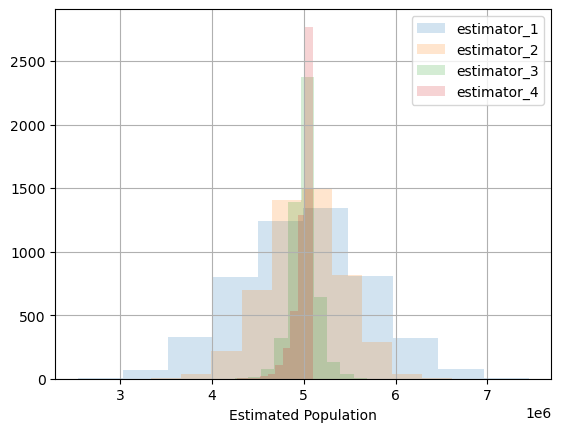

In [89]:
for estimator in [1,2,3,4]:
    col_label = 'est_{}'.format(estimator)
    draw_label = 'estimator_{}'.format(estimator)
    estimator_df[col_label].hist(label=draw_label,alpha=alpha)
plt.xlabel('Estimated Population')
plt.legend()
plt.show()

In [90]:
for estimator in [1,2,3,4]:
    mean = np.mean(estimator_df['est_{}'.format(estimator)])
    var = np.var(estimator_df['est_{}'.format(estimator)])
    sig = math.sqrt(var)
    print('estimator {}: mean:{:.1f} var:{:.1f} sig:{:.1f}'.format(estimator,mean,var,sig))

estimator 1: mean:5003178.0 var:482227807099.2 sig:694426.2
estimator 2: mean:5001859.5 var:170979310327.4 sig:413496.4
estimator 3: mean:4999385.2 var:18614549647.8 sig:136435.1
estimator 4: mean:5000747.7 var:9439301342.8 sig:97156.1


<p>Ainsi, en conclusion, même si les quatre estimateurs sont non biaisés, l'estimateur basé sur la médiane est de loin le moins efficace, suivi par l'estimateur basé sur la moyenne.</p>
<p>Assez curieusement, l'estimateur ne tenant compte que du numéro le plus élevé de l'échantillon sera le plus efficace.</p>